# Player Analysis

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning And Exploring

In [217]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [218]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [219]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 22)

In [220]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,2,0,0,2,2,NaN,NaN


### Considering Only KXIP VS RCB Matches

In [221]:
PB=matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Kings XI Punjab'))]

In [222]:
PB.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1678,8,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,SR Watson,Vishnu Vinod,AR Patel,0,0,1,0,1,NaN,NaN
1679,8,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,Vishnu Vinod,SR Watson,AR Patel,0,0,0,0,0,NaN,NaN
1680,8,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,Vishnu Vinod,SR Watson,AR Patel,0,0,1,0,1,NaN,NaN
1681,8,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,NaN,NaN
1682,8,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,SR Watson,Vishnu Vinod,AR Patel,0,0,0,0,0,NaN,NaN


Taking in consideration only last 7 years matches because using too old data for analysis might not help that much while predicting Cricket matches result :

In [ ]:
cond1 = PB["season"] == 2013
cond2 = PB["season"] == 2014
cond3 = PB["season"] == 2015
cond4 = PB["season"] == 2016
cond5 = PB["season"] == 2017
cond6 = PB["season"] == 2018
cond7 = PB["season"] == 2019
final = PB[cond1|cond2|cond3|cond4|cond5|cond6|cond7]

final.head()

In [224]:
final.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

In [225]:
final.batsman.unique()

array(['SR Watson', 'Vishnu Vinod', 'AB de Villiers', 'KM Jadhav',
       'Mandeep Singh', 'STR Binny', 'M Vohra', 'HM Amla', 'AR Patel',
       'GJ Maxwell', 'MJ Guptill', 'SE Marsh', 'WP Saha', 'MM Sharma',
       'VR Aaron', 'CH Gayle', 'V Kohli', 'P Negi', 'S Aravind',
       'S Badree', 'YS Chahal', 'A Choudhary', 'CA Pujara',
       'MC Henriques', 'KL Rahul', 'AC Gilchrist', 'Azhar Mahmood',
       'DA Miller', 'R Sathish', 'Gurkeerat Singh', 'DJ Hussey',
       'PA Patel', 'YV Takawale', 'Yuvraj Singh', 'JA Morkel', 'MA Starc',
       'AB Dinda', 'V Sehwag', 'GJ Bailey', 'R Dhawan', 'MG Johnson',
       'Shivam Sharma', 'L Balaji', 'S Rana', 'HV Patel', 'KD Karthik',
       'SN Khan', 'M Vijay', 'Anureet Singh', 'Karanveer Singh',
       'Sandeep Sharma', 'D Wiese', 'Sachin Baby', 'TM Head',
       'MP Stoinis', 'F Behardien', 'KJ Abbott', 'KC Cariappa',
       'MA Agarwal', 'AJ Finch', 'KK Nair', 'R Ashwin', 'AJ Tye',
       'M Ur Rahman', 'Q de Kock', 'BB McCullum', 'CR Woake

## Wicket fall Analysis of KXIP

In [319]:
Each_team_wicket_fall = pd.DataFrame(final.groupby("bowling_team").player_dismissed.count())

Each_team_wicket_fall.columns=["Total wicket fall"]

print("Wicket fall down for each team (overall) :")
Each_team_wicket_fall

Wicket fall down for each team (overall) :


,Total wicket fall
bowling_team,
Kings XI Punjab,69
Royal Challengers Bangalore,89


In [227]:
wicket = final[final["bowling_team"] == "Royal Challengers Bangalore"]
KXIP_wickets = pd.DataFrame(wicket.groupby(['season',"match_id","bowling_team"]).agg({'player_dismissed' : 'count'}))
print("KXIP wickets fall down against RCB in all matches :")
KXIP_wickets.columns = ["Total Wicket Fall of KXIP"]
KXIP_wickets

KXIP wickets fall down against RCB in all matches :


Total Wicket Fall of KXIP
season match_id bowling_team                                          
2013   429      Royal Challengers Bangalore                          3
       448      Royal Challengers Bangalore                          4
2014   475      Royal Challengers Bangalore                          5
       488      Royal Challengers Bangalore                          8
2015   557      Royal Challengers Bangalore                         10
       566      Royal Challengers Bangalore                          6
2016   615      Royal Challengers Bangalore                          4
       626      Royal Challengers Bangalore                          9
2017   8        Royal Challengers Bangalore                          2
       42       Royal Challengers Bangalore                          7
2018   7901     Royal Challengers Bangalore                         10
       7941     Royal Challengers Bangalore                         10
2019   11319    Royal Challengers Bangalore                          4
       11333    Royal Challengers Bangalore                          7

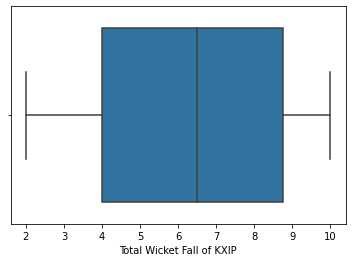

In [228]:
sns.boxplot(KXIP_wickets["Total Wicket Fall of KXIP"])

In [320]:
count = final.match_id.unique()
count = len(count)
wicket = final[final["bowling_team"] == "Royal Challengers Bangalore"]
wkt = wicket["player_dismissed"].count()
print("Total wickets fall of KXIP against RCB = {} in {} matches".format(wkt ,count))

Total wickets fall of KXIP against RCB = 89 in 14 matches


In [230]:
per_match_wicket = wkt/count
per_match_wicket = round(per_match_wicket)
print("On an average , Per match wicket fall down for KXIP :",per_match_wicket)

On an average , Per match wicket fall down for KXIP : 6.0


### Confidence Interval Calculation :

In [321]:
KXIP_wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Wicket Fall of KXIP,14.0,6.357143,2.762584,2.0,4.0,6.5,8.75,10.0


In [322]:
mean = KXIP_wickets["Total Wicket Fall of KXIP"].mean()
sd = KXIP_wickets["Total Wicket Fall of KXIP"].std()
n = len(KXIP_wickets)

n

14

In [323]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.7383315230914774

In [324]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total Wicket that can be fall today of KXIP :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total Wicket that can be fall today of KXIP :(5.0, 8.0)


## Partnership Analysis

Taking in consideration only those columns where batsman and non striker are AB de Villers and V Kohli for getting the data related to their partnership :

In [308]:
AV =final[np.logical_or(np.logical_and(final['batsman']=='V Kohli',final['non_striker']=='AB de Villiers'),
                            np.logical_and(final['non_striker']=='V Kohli',final['batsman']=='AB de Villiers'))]

In [309]:
AV.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
101677,429,2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,AB de Villiers,V Kohli,P Awana,0,0,6,0,6,NaN,NaN
101678,429,2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,AB de Villiers,V Kohli,P Awana,0,0,0,0,0,AB de Villiers,bowled
106218,448,2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,AB de Villiers,V Kohli,MS Gony,0,0,4,0,4,NaN,NaN
106219,448,2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,AB de Villiers,V Kohli,MS Gony,0,0,0,0,0,NaN,NaN
106220,448,2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,...,AB de Villiers,V Kohli,MS Gony,0,0,1,0,1,NaN,NaN


In [325]:
AV.season.unique()

array([2013, 2016, 2019], dtype=int64)

In [310]:
AV.match_id.unique()

array([  429,   448,   615,   626, 11319], dtype=int64)

In [326]:
partnership = pd.DataFrame(AV.groupby(["season","match_id"])["total_runs"].sum())

partnership.columns = ["Partnership b/w ABD and VK"]

print("Season wise partnership of ABD and VK:")

partnership

Season wise partnership of ABD and VK:


Partnership b/w ABD and VK
season match_id                            
2013   429                                6
       448                               11
2016   615                                1
       626                                7
2019   11319                             86

In [312]:
partnership.describe().T

,count,mean,std,min,25%,50%,75%,max
Partnership b/w ABD and VK,5.0,22.2,35.842712,1.0,6.0,7.0,11.0,86.0


In [313]:
print("Average no of run's partnership beween AB and VK in RCB VS KXIP matches :",round(partnership["Partnership b/w ABD and VK"].mean()))

Average no of run's partnership beween AB and VK in RCB VS KXIP matches : 22


### Inning wise Partnership Analysis


#### Overall partnership against all the teams (inning wise) in last 2 years :

In [351]:
VKAB =matches[np.logical_or(np.logical_and(matches['batsman']=='V Kohli',matches['non_striker']=='AB de Villiers'),
                            np.logical_and(matches['non_striker']=='V Kohli',matches['batsman']=='AB de Villiers'))]

In [352]:
cond6 = VKAB["season"] == 2018
cond7 = VKAB["season"] == 2019
Fill = VKAB[cond6|cond7]

In [354]:
inning_wise_partnership_overall = pd.DataFrame(Fill.groupby(["season","match_id","inning"])["total_runs"].sum())

inning_wise_partnership_overall

total_runs
season match_id inning            
2018   7896     1               64
       7904     2               21
       7907     2                2
       7912     2               64
       7932     2               15
       7938     2              120
       7944     1               32
2019   11143    2               50
       11147    2                2
       11153    1              109
       11311    1               26
       11319    2               86
       11337    2                5
       11340    1               35
       11345    2               17

#### Parntership against KXIP bowlers  :

In [355]:
inning_wise_partnership = pd.DataFrame(AV.groupby(["season","match_id","inning"])["total_runs"].sum())

inning_wise_partnership

total_runs
season match_id inning            
2013   429      1                6
       448      1               11
2016   615      1                1
       626      1                7
2019   11319    2               86

### Partnership Breakdown by KXIP Bowlers

In [314]:
partnership_dismiss = AV[(AV["player_dismissed"]=="V Kohli") | (AV["player_dismissed"]=="AB de Villiers")]

In [315]:
dismissal_record = pd.DataFrame(partnership_dismiss.groupby(["season","match_id","bowler","batsman"])["player_dismissed"].count())

dismissal_record.columns = ["Player dismissal count"] 

print("Partnership breakdown by :")
dismissal_record

Partnership breakdown by :


Player dismissal count
season match_id bowler         batsman                               
2013   429      P Awana        AB de Villiers                       1
       448      P Awana        V Kohli                              1
2016   615      KC Cariappa    V Kohli                              1
       626      KJ Abbott      AB de Villiers                       1
2019   11319    Mohammed Shami V Kohli                              1

From here we can see that out of their 5 last partnerships majority times the partnership is broken by the pacers.

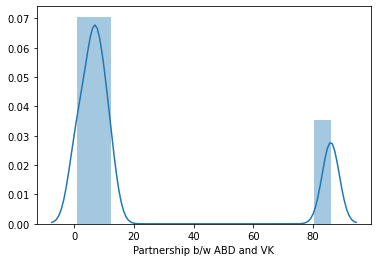

In [316]:
sns.distplot(partnership["Partnership b/w ABD and VK"])

From the plot above of their last 5 partnerships we can see that their partnership either broke down early when less then 20 runs or otherwise it goes for a long hunt. 

So, from all the above analysis related to their average partnership runs, dismissal, dismissal time , inning wise partnership etc we can predict that if both these batsman stayed long on crease(20+ runs initially) then they are expected to have a big partnership together.

## Sixes count analysis

In [131]:
six = final[final["batsman_runs"]==6]

In [132]:
per_match_sixes = pd.DataFrame(six.groupby("match_id")["batsman_runs"].count())
per_match_sixes.columns = ["six count"]

per_match_sixes

,six count
match_id,
8,20
42,6
429,14
448,14
475,4
488,16
557,21
566,7
615,5


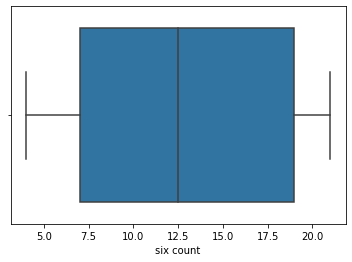

In [133]:
sns.boxplot(per_match_sixes["six count"])

In [134]:
print("Average no of sixes scored in RCB VS KXIP matches :",round(per_match_sixes["six count"].mean()))

Average no of sixes scored in RCB VS KXIP matches : 13


### Confidence Interval Calculation :

In [135]:
per_match_sixes.describe().T

,count,mean,std,min,25%,50%,75%,max
six count,14.0,12.571429,6.284465,4.0,7.0,12.5,19.0,21.0


In [179]:
mean = per_match_sixes["six count"].mean()
sd = per_match_sixes["six count"].std()
n = len(per_match_sixes)

n

14

In [180]:
tstar = 2.064
se = sd/np.sqrt(n)
se

1.679594030338996

In [181]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total sixes that can be hit in today's match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total sixes that can be hit in today's match :(9.0, 16.0)


### No ball Analysis


In [168]:
nbcount = final[final["noball_runs"] >0]

In [169]:
nbcount.noball_runs.value_counts()

1    15
2     1
Name: noball_runs, dtype: int64

In [208]:
runs_from_noballs = nbcount.noball_runs.sum()

print("Runs from no ball delivery (overall) :",runs_from_noballs)

Runs from no ball delivery (overall) : 17


In [199]:
no_balls_per_match = pd.DataFrame(nbcount.groupby("match_id")["noball_runs"].count())

no_balls_per_match.columns = ["noball count"]


print("No balls bowled in RCB VS KXIP matches :")
no_balls_per_match

No balls bowled in RCB VS KXIP matches :


,noball count
match_id,
429,3
448,2
475,2
488,2
557,1
566,1
626,2
7941,1
11333,2


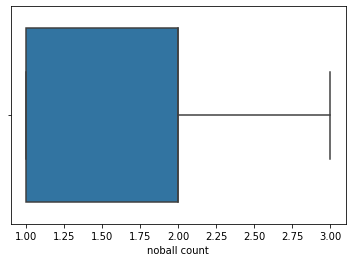

In [201]:
sns.boxplot(no_balls_per_match["noball count"])

In [357]:
count = final.match_id.unique()
count = len(count)

total_no_balls = nbcount.noball_runs.count()

Avg_no_ball = total_no_balls/count

print("On an average , No Balls bowled in RCB VS KXIP matches (overall) :",round(Avg_no_ball))

On an average , No Balls bowled in RCB VS KXIP matches (overall) : 1.0


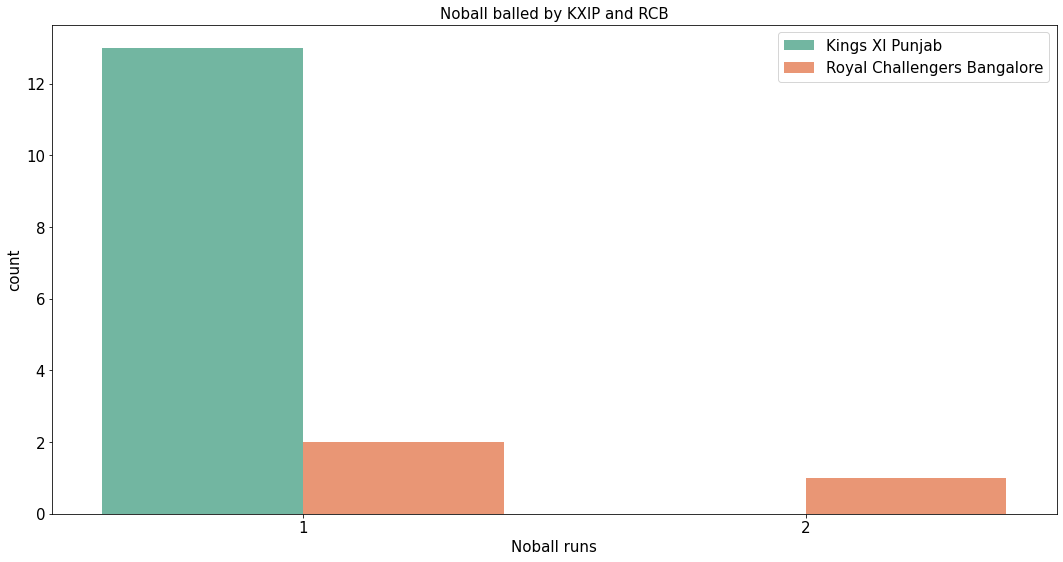

In [359]:
plt.figure(figsize = (18,9))
sns.countplot(nbcount['noball_runs'],palette='Set2',hue=nbcount['bowling_team'])
plt.title('Noball balled by KXIP and RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Noball runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

So, from the analysis of no balls we see that there are 9 matches out of 14 matches where 1 or more no balls were bowled and KXIP bowlers have bowled more no balls as campared to RCB bowlers.

Also in an average we found that 1 no ball is bowled per match .

So based on all these information we can estimate that for this match also 0 -1 noball are expected to be bowled.